In [1]:
%matplotlib inline

#stdlib
import csv
import json

from datetime import datetime
from collections import defaultdict


#requirements
import matplotlib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


sns.set(style="whitegrid")

def pp(data):
    print(json.dumps(data, sort_keys=True, indent=4))

### Input

let's read in the sleeps data we've collected

In [2]:
sleeps = json.load(open('sleeps.json', 'r'))
print(len(sleeps))

2000


## Let's see what a sleep looks like

In [3]:
pp(sleeps[0])

{
    "dateOfSleep": "2019-05-12",
    "duration": 30240000,
    "efficiency": 93,
    "endTime": "2019-05-12T07:30:00.000",
    "infoCode": 0,
    "levels": {
        "data": [
            {
                "dateTime": "2019-05-11T23:06:00.000",
                "level": "wake",
                "seconds": 420
            },
            {
                "dateTime": "2019-05-11T23:13:00.000",
                "level": "light",
                "seconds": 1230
            },
            {
                "dateTime": "2019-05-11T23:33:30.000",
                "level": "deep",
                "seconds": 1590
            },
            {
                "dateTime": "2019-05-12T00:00:00.000",
                "level": "light",
                "seconds": 450
            },
            {
                "dateTime": "2019-05-12T00:07:30.000",
                "level": "deep",
                "seconds": 990
            },
            {
                "dateTime": "2019-05-12T00:24:00.000",
         

## Flattening

We'll flatten the data and store it as a csv to make it slightly easier to deal with later with pandas

In [4]:
columns = ['dateOfSleep', 'duration', 'efficiency', 'endTime', 'minutesAsleep', 'minutesAwake', 'minutesToFallAsleep', 'startTime', 'timeInBed']

with open('sleep_data.csv', 'w') as output_file:
    
    writer = csv.DictWriter(output_file, columns)
    writer.writeheader()
    
    for sleep in sleeps:
        data = {}
        for c in columns:
            data[c] = sleep[c]
        writer.writerow(data)

## Dataframing!

Great, so we have a csv, let's turn that into a pandas DataFrame

In [5]:
sleep_data = pd.read_csv('sleep_data.csv')
print(sleep_data.describe())

           duration   efficiency  minutesAsleep  minutesAwake  \
count  2.000000e+03  2000.000000    2000.000000   2000.000000   
mean   2.533884e+07    94.129000     387.772500     27.770500   
std    6.306845e+06     6.268334      96.710776     19.593922   
min    6.000000e+04     0.000000       0.000000      0.000000   
25%    2.442000e+07    93.000000     370.000000     14.000000   
50%    2.670000e+07    95.000000     410.000000     23.000000   
75%    2.856000e+07    97.000000     441.000000     39.000000   
max    4.284000e+07   100.000000     628.000000    234.000000   

       minutesToFallAsleep    timeInBed  
count          2000.000000  2000.000000  
mean              4.320000   422.314000  
std              10.807173   105.114085  
min               0.000000     1.000000  
25%               0.000000   407.000000  
50%               0.000000   445.000000  
75%               0.000000   476.000000  
max             116.000000   714.000000  


In [6]:
for column in ['dateOfSleep', 'endTime', 'startTime']:
    sleep_data[column] = pd.to_datetime(sleep_data[column])
sleep_data

,dateOfSleep,duration,efficiency,endTime,minutesAsleep,minutesAwake,minutesToFallAsleep,startTime,timeInBed
0,2019-05-12,30240000,93,2019-05-12 07:30:00,430,74,0,2019-05-11 23:06:00,504
1,2019-05-11,24660000,92,2019-05-11 06:18:00,367,44,0,2019-05-10 23:27:00,411
2,2019-05-10,23520000,98,2019-05-10 06:25:30,348,44,0,2019-05-09 23:53:30,392
3,2019-05-09,26340000,97,2019-05-09 06:19:30,396,43,0,2019-05-08 23:00:00,439
4,2019-05-08,22980000,93,2019-05-08 06:28:00,333,50,0,2019-05-08 00:04:30,383
5,2019-05-07,26760000,93,2019-05-07 06:09:00,383,63,0,2019-05-06 22:42:30,446
6,2019-05-06,28920000,95,2019-05-06 07:26:00,420,62,0,2019-05-05 23:24:00,482
7,2019-05-05,26160000,96,2019-05-05 06:25:30,386,50,0,2019-05-04 23:09:00,436
8,2019-05-04,26400000,91,2019-05-04 06:32:30,390,50,0,2019-05-03 23:12:00,440
9,2019-05-03,28140000,96,2019-05-03 06:16:00,420,49,0,2019-05-02 22:27:00,469


## Sorting!

Fitbit gave us the data most-recent first, and it's more logical for us to work with it the other way round, so let's sort the dataframe

In [7]:
sleep_data.sort_values(by='dateOfSleep', inplace=True)
sleep_data

,dateOfSleep,duration,efficiency,endTime,minutesAsleep,minutesAwake,minutesToFallAsleep,startTime,timeInBed
1999,2013-09-25,24900000,93,2013-09-25 06:15:00,375,27,13,2013-09-24 23:20:00,415
1998,2013-09-26,27600000,87,2013-09-26 08:00:00,400,60,0,2013-09-26 00:20:00,460
1997,2013-09-27,19260000,96,2013-09-27 05:30:00,266,10,45,2013-09-27 00:09:00,321
1996,2013-09-28,26340000,96,2013-09-28 07:30:00,405,18,9,2013-09-28 00:11:00,439
1995,2013-09-29,22680000,95,2013-09-29 07:30:00,352,20,6,2013-09-29 01:12:00,378
1994,2013-09-30,26100000,93,2013-09-30 06:13:00,402,30,3,2013-09-29 22:58:00,435
1993,2013-09-30,1200000,0,2013-09-30 11:05:00,0,0,20,2013-09-30 10:45:00,20
1992,2013-10-02,18540000,100,2013-10-02 00:10:00,304,0,5,2013-10-01 19:01:00,309
1991,2013-10-03,35340000,98,2013-10-03 06:15:00,537,13,39,2013-10-02 20:26:00,589
1990,2013-10-04,25800000,94,2013-10-04 06:18:00,388,23,14,2013-10-03 23:08:00,430


## Grouping

Lets work out how much sleep we had in each month. First lets add month-year as a column in our dataframe

In [8]:
sleep_data['Month-Year'] = sleep_data['dateOfSleep'].dt.strftime('%Y-%m')
sleep_data['Month'] = sleep_data['dateOfSleep'].dt.strftime('%m')
sleep_data['Year'] = sleep_data['dateOfSleep'].dt.strftime('%Y')
sleep_data

,dateOfSleep,duration,efficiency,endTime,minutesAsleep,minutesAwake,minutesToFallAsleep,startTime,timeInBed,Month-Year,Month,Year
1999,2013-09-25,24900000,93,2013-09-25 06:15:00,375,27,13,2013-09-24 23:20:00,415,2013-09,09,2013
1998,2013-09-26,27600000,87,2013-09-26 08:00:00,400,60,0,2013-09-26 00:20:00,460,2013-09,09,2013
1997,2013-09-27,19260000,96,2013-09-27 05:30:00,266,10,45,2013-09-27 00:09:00,321,2013-09,09,2013
1996,2013-09-28,26340000,96,2013-09-28 07:30:00,405,18,9,2013-09-28 00:11:00,439,2013-09,09,2013
1995,2013-09-29,22680000,95,2013-09-29 07:30:00,352,20,6,2013-09-29 01:12:00,378,2013-09,09,2013
1994,2013-09-30,26100000,93,2013-09-30 06:13:00,402,30,3,2013-09-29 22:58:00,435,2013-09,09,2013
1993,2013-09-30,1200000,0,2013-09-30 11:05:00,0,0,20,2013-09-30 10:45:00,20,2013-09,09,2013
1992,2013-10-02,18540000,100,2013-10-02 00:10:00,304,0,5,2013-10-01 19:01:00,309,2013-10,10,2013
1991,2013-10-03,35340000,98,2013-10-03 06:15:00,537,13,39,2013-10-02 20:26:00,589,2013-10,10,2013
1990,2013-10-04,25800000,94,2013-10-04 06:18:00,388,23,14,2013-10-03 23:08:00,430,2013-10,10,2013


## Sleep Durations

Let's see what the average sleep duration in each month is

In [9]:
monthly_average_sleep = sleep_data.groupby('Month-Year')['minutesAsleep'].mean()
monthly_average_sleep

Month-Year
2013-09    314.285714
2013-10    438.960000
2013-11    404.346154
2013-12    390.720000
2014-01    381.771429
2014-02    396.600000
2014-03    425.709677
2014-04    420.733333
2014-05    431.045455
2014-06    404.652174
2014-07    432.120000
2014-11    451.384615
2015-01    445.851852
2015-02    426.666667
2015-03    442.718750
2015-04    453.500000
2015-05    412.875000
2015-06    241.229167
2015-07    276.061224
2015-08    390.485714
2015-09    319.000000
2015-10    324.736842
2015-11    358.235294
2015-12    334.769231
2016-01    351.162162
2016-02    393.781250
2016-03    358.083333
2016-04    394.709677
2016-05    392.187500
2016-06    415.096774
              ...    
2016-12    395.406250
2017-01    411.212121
2017-02    419.655172
2017-03    431.967742
2017-04    415.666667
2017-05    422.032258
2017-06    424.533333
2017-07    412.645161
2017-08    421.193548
2017-09    369.281250
2017-10    334.055556
2017-11    354.235294
2017-12    330.789474
2018-01    348.114286

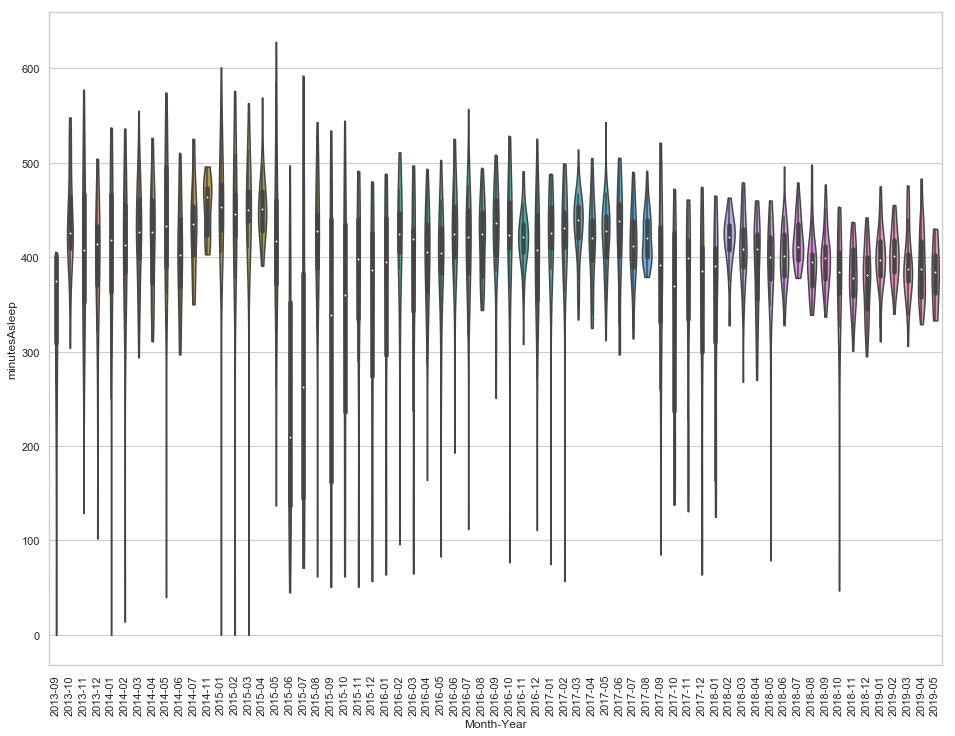

In [10]:
plt.figure(figsize=[16,12])
plt.xticks(rotation=90)

sns.violinplot(data=sleep_data, x='Month-Year', y='minutesAsleep', cut=0)


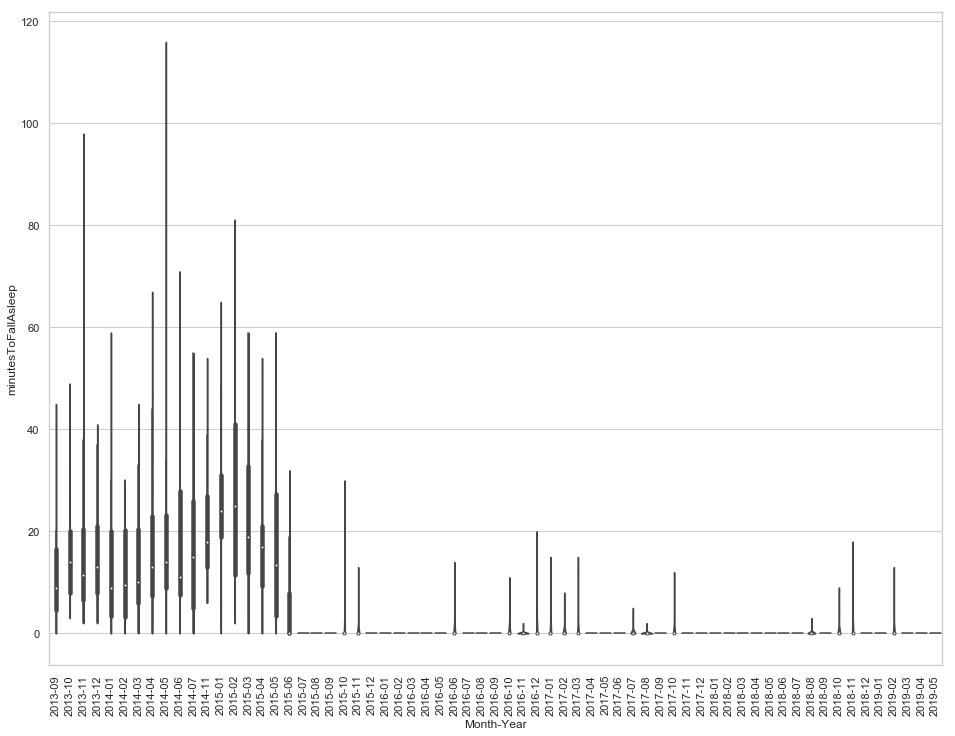

In [11]:
plt.figure(figsize=[16,12])
plt.xticks(rotation=90)

sns.violinplot(data=sleep_data, x='Month-Year', y='minutesToFallAsleep', cut=0)

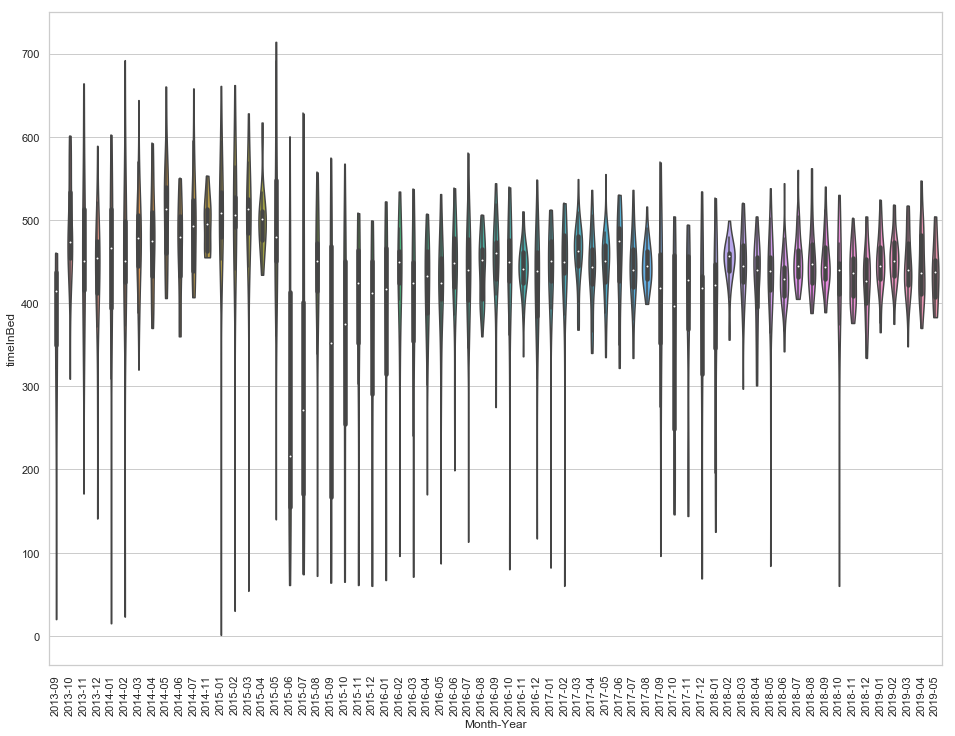

In [12]:
plt.figure(figsize=[16,12])
plt.xticks(rotation=90)

sns.violinplot(data=sleep_data, x='Month-Year', y='timeInBed', cut=0)

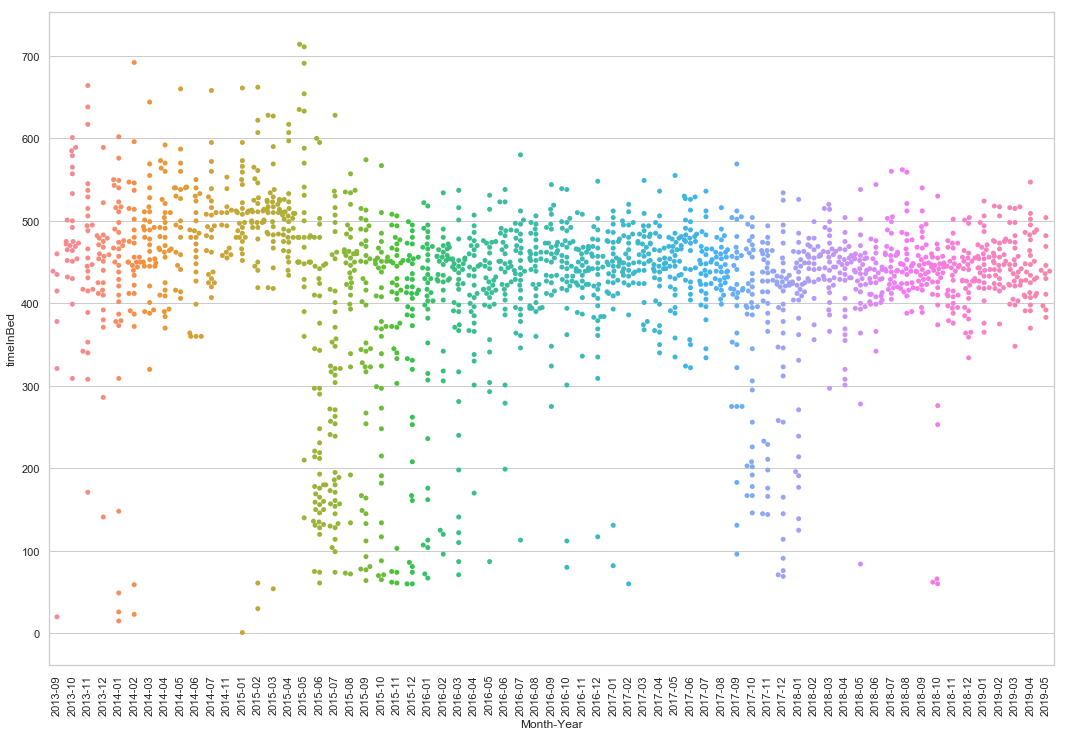

In [13]:
plt.figure(figsize=[18,12])
plt.xticks(rotation=90)
sns.set(font_scale=1.5)
sns.swarmplot(data=sleep_data, x='Month-Year', y='timeInBed')

In [14]:
sleep_data.describe()

,duration,efficiency,minutesAsleep,minutesAwake,minutesToFallAsleep,timeInBed
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,2.533884e+07,94.129000,387.772500,27.770500,4.320000,422.314000
std,6.306845e+06,6.268334,96.710776,19.593922,10.807173,105.114085
min,6.000000e+04,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.442000e+07,93.000000,370.000000,14.000000,0.000000,407.000000
50%,2.670000e+07,95.000000,410.000000,23.000000,0.000000,445.000000
75%,2.856000e+07,97.000000,441.000000,39.000000,0.000000,476.000000
max,4.284000e+07,100.000000,628.000000,234.000000,116.000000,714.000000
